In [1]:
import os
from progressbar import ProgressBar
from RestlessBandit.algorithms import * 
from RestlessBandit.arm_generator import *

Experiment 1

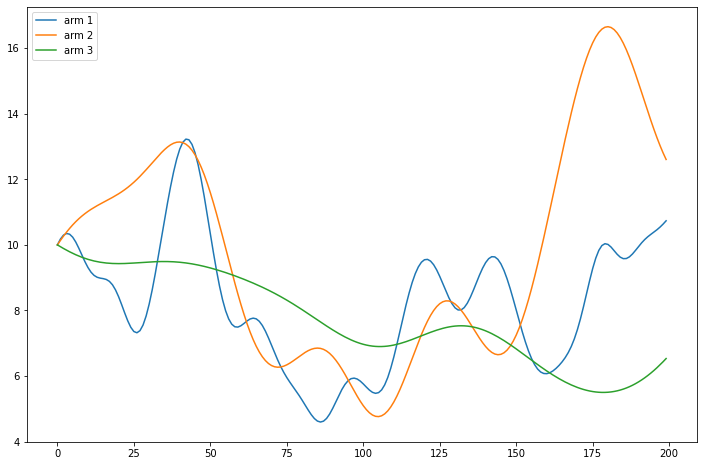

In [2]:
arm1=expect_reward_generator(200,lengthscale=8,variance=5,Smooth=True,Plot=False)+10  #generate three arms
arm2=expect_reward_generator(200,lengthscale=16,variance=5,Smooth=True,Plot=False)+10
arm3=expect_reward_generator(200,lengthscale=32,variance=5,Smooth=True,Plot=False)+10

plt.figure(figsize=(12, 8))
plt.plot(arm1,label='arm 1')
plt.plot(arm2,label='arm 2')
plt.plot(arm3,label='arm 3')
plt.legend()

In [10]:
N = 100
T = 200

EF_record=[]
UCB_record=[]
GPR_record=[]
GPR_mismatch_record=[]

pbar = ProgressBar() #showing the progress of the code

for exp in pbar(range(N)):

  arm1=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)
  arm2=expect_reward_generator(T,lengthscale=20,variance=5,Smooth=True,Plot=False)
  arm3=expect_reward_generator(T,lengthscale=40,variance=5,Smooth=True,Plot=False)

  max_reward = np.maximum.reduce([arm1,arm2,arm3])
  C=np.sum(np.abs(np.maximum.reduce([arm1,arm2,arm3])))

  regret_holder_EF=EF(T, arm1,arm2,arm3)/C
  regret_holder_UCB= UCB_f(T, arm1,arm2,arm3)/C
  regret_holder_GPR_mismatch,_= GPR_fit(T, 'Matern52',0, arm1,arm2,arm3)/C

  EF_record.append(regret_holder_EF)
  UCB_record.append(regret_holder_UCB)
  GPR_mismatch_record.append(regret_holder_GPR_mismatch)

 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:581: RuntimeWarning:invalid value encountered in multiply
100% |########################################################################|


In [11]:
EF_record=np.array(EF_record).reshape(N,T)
UCB_record=np.array(UCB_record).reshape(N,T)
GPR_mismatch_record=np.array(GPR_mismatch_record).reshape(N,T)

# np.savetxt('EF_record.csv', EF_record, delimiter=',')
# np.savetxt('UCB_record.csv', UCB_record, delimiter=',')
# np.savetxt('GPR_mismatch_record.csv', GPR_mismatch_record, delimiter=',')

In [12]:
EF_cumsum=np.cumsum(EF_record,axis=1)
UCB_cumsum=np.cumsum(UCB_record,axis=1)
GPR_mismatch_cumsum=np.cumsum(GPR_mismatch_record,axis=1)


EF_cumsum_average=np.mean(EF_cumsum,axis=0)
UCB_cumsum_average=np.mean(UCB_cumsum,axis=0)
GPR_cumsum_mismatch_average=np.mean(GPR_mismatch_cumsum,axis=0)

EF_cumsum_std=np.sqrt(np.var(EF_cumsum,axis=0))/math.sqrt(N)
UCB_cumsum_std=np.sqrt(np.var(UCB_cumsum,axis=0))/math.sqrt(N)
GPR_mismatch_cumsum_std=np.sqrt(np.var(GPR_mismatch_cumsum,axis=0))/math.sqrt(N)

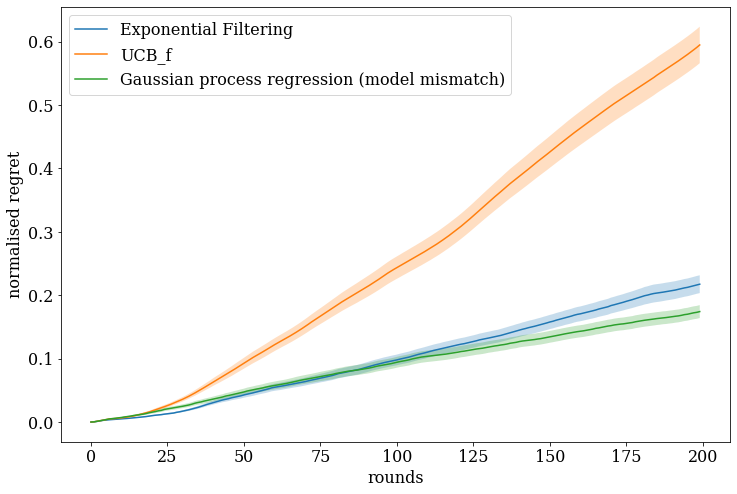

In [13]:
plt.rcParams['font.size'] = '16'
plt.rc('font', family='serif')
plt.figure(figsize=(12, 8))

plt.plot(EF_cumsum_average,label='Exponential Filtering')
plt.fill_between(range(T), EF_cumsum_average-EF_cumsum_std, EF_cumsum_average+EF_cumsum_std, alpha=0.25)

plt.plot(UCB_cumsum_average,label='UCB_f')
plt.fill_between(range(T), UCB_cumsum_average-UCB_cumsum_std, UCB_cumsum_average+UCB_cumsum_std, alpha=0.25)

plt.plot(GPR_cumsum_mismatch_average,label='Gaussian process regression (model mismatch)')
plt.fill_between(range(T), GPR_cumsum_mismatch_average-GPR_mismatch_cumsum_std, GPR_cumsum_mismatch_average+GPR_mismatch_cumsum_std, alpha=0.25)


plt.xlabel('rounds',fontsize=16)
plt.ylabel('normalised regret',fontsize=16)
plt.legend()

Experiment 2 

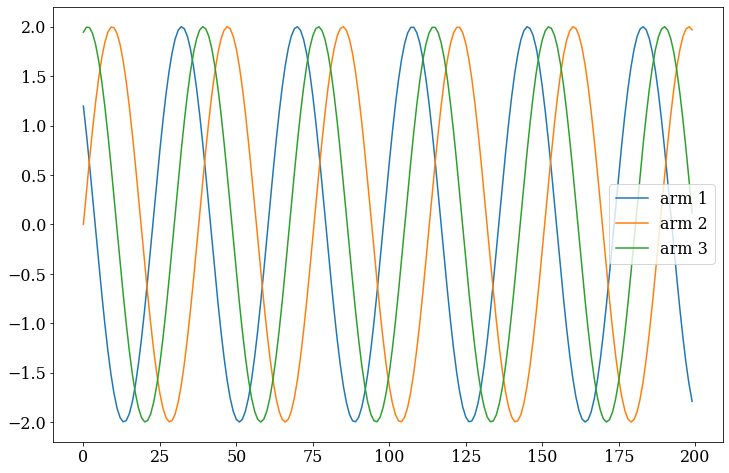

In [10]:
arm1 = expect_reward_generato_sin(200,6,2,15,Plot=False)
arm2 = expect_reward_generato_sin(200,6,2,0,Plot=False)
arm3 = expect_reward_generato_sin(200,6,2,8,Plot=False)

plt.figure(figsize=(12, 8))
plt.plot(arm1,label='arm 1')
plt.plot(arm2,label='arm 2')
plt.plot(arm3,label='arm 3')
plt.legend()

In [25]:
EF_record=[]
UCB_record=[]
GPR_record=[]


arm1 = expect_reward_generato_sin(200,6,2,15,Plot=False)
arm2 = expect_reward_generato_sin(200,6,2,0,Plot=False)
arm3 = expect_reward_generato_sin(200,6,2,4,Plot=False)

arms=[arm1,arm2,arm3]
max_reward = np.maximum.reduce(arms)
C=np.sum(np.abs(np.maximum.reduce(arms)))

N = 100
T = 200

pbar = ProgressBar() #showing the progress of the code

for exp in pbar(range(N)):
    
    regret_holder_EF=EF(arms)/C
    regret_holder_UCB= UCB_f(arms)/C
    regret_holder_GPR= GPR_fit(arms,'Matern52')/C


    EF_record.append(regret_holder_EF)
    UCB_record.append(regret_holder_UCB)
    GPR_record.append(regret_holder_GPR)
   


 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:581: RuntimeWarning:overflow encountered in square
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:581: RuntimeWarning:invalid value encountered in multiply
100% |########################################################################|


In [26]:
EF_record=np.array(EF_record).reshape(N,T)
UCB_record=np.array(UCB_record).reshape(N,T)
GPR_record=np.array(GPR_record).reshape(N,T)

#np.savetxt('EF_record.csv', EF_record, delimiter=',')
#np.savetxt('UCB_record.csv', UCB_record, delimiter=',')
#np.savetxt('GPR_record.csv', GPR_record, delimiter=',')


In [27]:
EF_cumsum=np.cumsum(EF_record,axis=1)
UCB_cumsum=np.cumsum(UCB_record,axis=1)
GPR_cumsum=np.cumsum(GPR_record,axis=1)


EF_cumsum_average=np.mean(EF_cumsum,axis=0)
UCB_cumsum_average=np.mean(UCB_cumsum,axis=0)
GPR_cumsum_average=np.mean(GPR_cumsum,axis=0)

EF_cumsum_std=np.sqrt(np.var(EF_cumsum,axis=0))/math.sqrt(N)
UCB_cumsum_std=np.sqrt(np.var(UCB_cumsum,axis=0))/math.sqrt(N)
GPR_cumsum_std=np.sqrt(np.var(GPR_cumsum,axis=0))/math.sqrt(N)

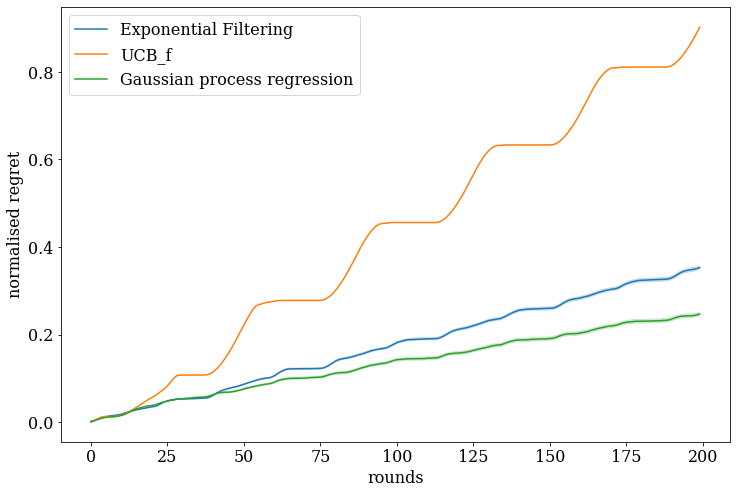

In [28]:
plt.rcParams['font.size'] = '16'
plt.rc('font', family='serif')
plt.figure(figsize=(12, 8))

plt.plot(EF_cumsum_average,label='Exponential Filtering')
plt.fill_between(range(T), EF_cumsum_average-EF_cumsum_std, EF_cumsum_average+EF_cumsum_std, alpha=0.25)

plt.plot(UCB_cumsum_average,label='UCB_f')
plt.fill_between(range(T), UCB_cumsum_average-UCB_cumsum_std, UCB_cumsum_average+UCB_cumsum_std, alpha=0.25)

plt.plot(GPR_cumsum_average,label='Gaussian process regression')
plt.fill_between(range(T), GPR_cumsum_average-GPR_cumsum_std, GPR_cumsum_average+GPR_cumsum_std, alpha=0.25)



plt.xlabel('rounds',fontsize=16)
plt.ylabel('normalised regret',fontsize=16)
plt.legend()

Experiment 3 (with switching cost=0)

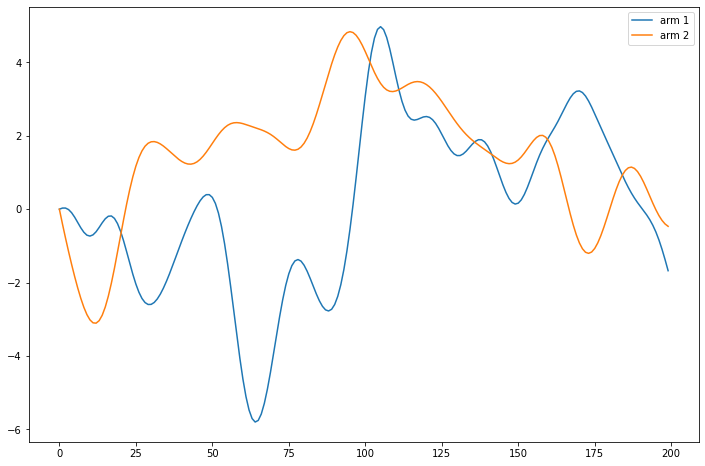

In [17]:
arm1=expect_reward_generator(200,lengthscale=8,variance=5,Smooth=True,Plot=False)
arm2=expect_reward_generator(200,lengthscale=10,variance=5,Smooth=True,Plot=False)

plt.figure(figsize=(12, 8))
plt.plot(arm1,label='arm 1')
plt.plot(arm2,label='arm 2')
plt.legend()

In [6]:
regret_normal = []
regret_dp = []

switch_normal = []
switch_dp = []

C = 0
N = 250

pbar = ProgressBar() #showing the progress of the code

for exp in pbar(range(N)):

  T=200

  arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
  arm2=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)
  
  Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))

  regret_holder1,choice1=GPR_fit(T, 'RBF',C,arm1,arm2)
  regret_holder2,choice2,models=GPR_DP(T,C, 0, arm1,arm2)

  regret_normal.append(regret_holder1/Normal)
  regret_dp.append(regret_holder2/Normal)


  switch1 = count_switch(choice1)
  switch2 = count_switch(choice2)

  switch_normal.append(switch1)
  switch_dp.append(switch2)

100% |########################################################################|


In [7]:
regret_record1=np.array(regret_normal).reshape(N,T)
regret_record2=np.array(regret_dp).reshape(N,T)

# np.savetxt('noraml_cost0.csv', regret_record1, delimiter=',')
# np.savetxt('DP_cost0.csv', regret_record2, delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)

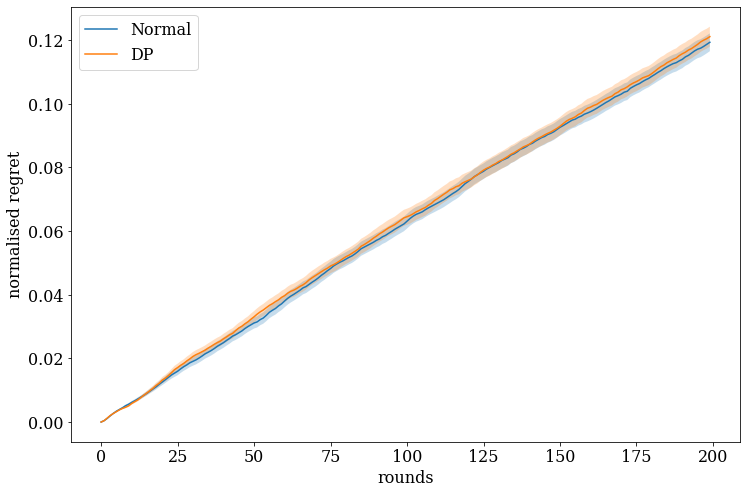

In [8]:
plt.rcParams['font.size'] = '16'
plt.rc('font', family='serif')
plt.figure(figsize=(12, 8))

plt.plot(cumsum_average1,label='Normal')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, alpha=0.25)

plt.plot(cumsum_average2,label='DP')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2, alpha=0.25)

plt.xlabel('rounds',fontsize=16)
plt.ylabel('normalised regret',fontsize=16)
plt.legend()

Experiment 4 (switching cost=1.5)

In [24]:
regret_normal = []
regret_dp = []

switch_normal = []
switch_dp = []

C = 1.5
N = 250

pbar = ProgressBar() #showing the progress of the code

for exp in pbar(range(N)):

  T=200

  arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
  arm2=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)
  
  Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))

  regret_holder1,choice1=GPR_fit(T, 'RBF',C,arm1,arm2)
  regret_holder2,choice2,models=GPR_DP(T,C, 0, arm1,arm2)

  regret_normal.append(regret_holder1/Normal)
  regret_dp.append(regret_holder2/Normal)


  switch1 = count_switch(choice1)
  switch2 = count_switch(choice2)

  switch_normal.append(switch1)
  switch_dp.append(switch2)

 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply
100% |########################################################################|


In [25]:
regret_record1=np.array(regret_normal).reshape(N,T)
regret_record2=np.array(regret_dp).reshape(N,T)


regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)

In [27]:
np.savetxt('noraml_cost1_5.csv', regret_record1, delimiter=',')
np.savetxt('DP_cost1_5.csv', regret_record2, delimiter=',')

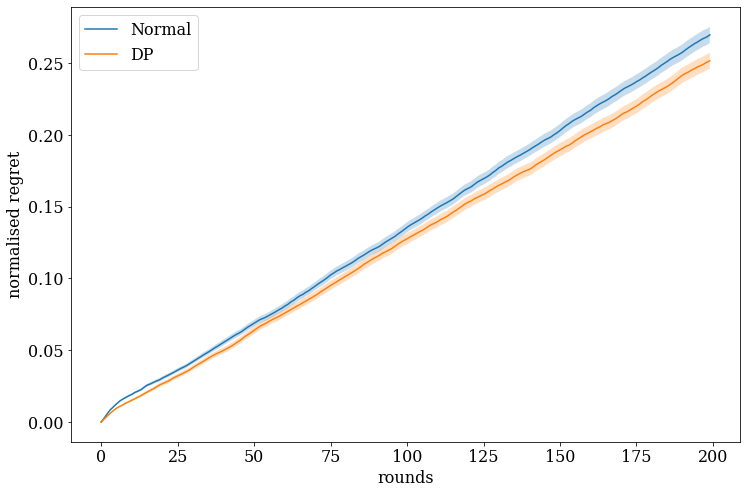

In [26]:
plt.rcParams['font.size'] = '16'
plt.rc('font', family='serif')
plt.figure(figsize=(12, 8))

plt.plot(cumsum_average1,label='Normal')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, alpha=0.25)

plt.plot(cumsum_average2,label='DP')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2, alpha=0.25)

plt.xlabel('rounds',fontsize=16)
plt.ylabel('normalised regret',fontsize=16)
plt.legend()

Experiment 5 (switching cost = 3)

In [15]:
regret_normal = []
regret_dp = []

switch_normal = []
switch_dp = []

C = 3
N = 250

pbar = ProgressBar() #showing the progress of the code

for exp in pbar(range(N)):

  T=200

  arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
  arm2=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)
  
  Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))

  regret_holder1,choice1=GPR_fit(T, 'RBF',C,arm1,arm2)
  regret_holder2,choice2,models=GPR_DP(T,C, 0, arm1,arm2)

  regret_normal.append(regret_holder1/Normal)
  regret_dp.append(regret_holder2/Normal)


  switch1 = count_switch(choice1)
  switch2 = count_switch(choice2)

  switch_normal.append(switch1)
  switch_dp.append(switch2)

 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply
100% |########################################################################|


In [16]:
regret_record1=np.array(regret_normal).reshape(N,T)
regret_record2=np.array(regret_dp).reshape(N,T)

# np.savetxt('noraml_cost3.csv', regret_record1, delimiter=',')
# np.savetxt('DP_cost3.csv', regret_record2, delimiter=',')

regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)

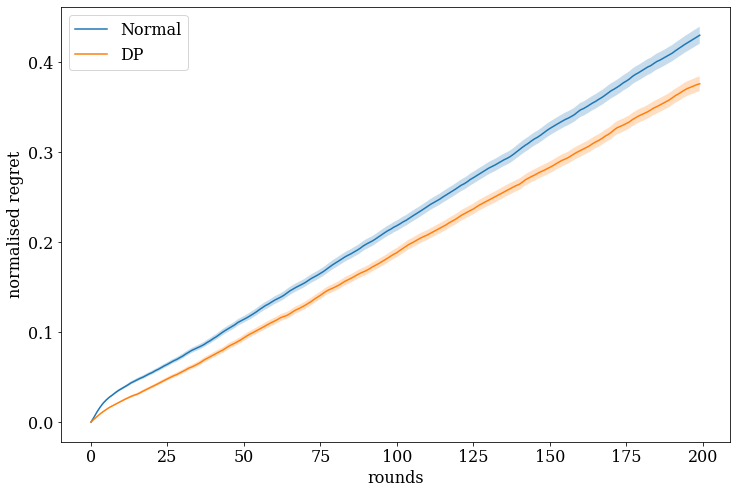

In [17]:
plt.rcParams['font.size'] = '16'
plt.rc('font', family='serif')
plt.figure(figsize=(12, 8))

plt.plot(cumsum_average1,label='Normal')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, alpha=0.25)

plt.plot(cumsum_average2,label='DP')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2, alpha=0.25)

plt.xlabel('rounds',fontsize=16)
plt.ylabel('normalised regret',fontsize=16)
plt.legend()

Experiment 6 (switching cost = 5)

In [20]:
regret_normal = []
regret_dp = []

switch_normal = []
switch_dp = []

C = 5
N = 250

pbar = ProgressBar() #showing the progress of the code

for exp in pbar(range(N)):

  T=200

  arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
  arm2=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)
  
  Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))

  regret_holder1,choice1=GPR_fit(T, 'RBF',C,arm1,arm2)
  regret_holder2,choice2,models=GPR_DP(T,C, 0, arm1,arm2)

  regret_normal.append(regret_holder1/Normal)
  regret_dp.append(regret_holder2/Normal)


  switch1 = count_switch(choice1)
  switch2 = count_switch(choice2)

  switch_normal.append(switch1)
  switch_dp.append(switch2)

 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply
100% |########################################################################|


In [21]:
regret_record1=np.array(regret_normal).reshape(N,T)
regret_record2=np.array(regret_dp).reshape(N,T)

# np.savetxt('noraml_cost5.csv', regret_record1, delimiter=',')
# np.savetxt('DP_cost5.csv', regret_record2, delimiter=',')


regret_cumsum1=np.cumsum(regret_record1,axis=1)
regret_cumsum2=np.cumsum(regret_record2,axis=1)


cumsum_average1=np.mean(regret_cumsum1,axis=0)
cumsum_average2=np.mean(regret_cumsum2,axis=0)

cumsum_std1=np.sqrt(np.var(regret_cumsum1,axis=0))/math.sqrt(N)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)

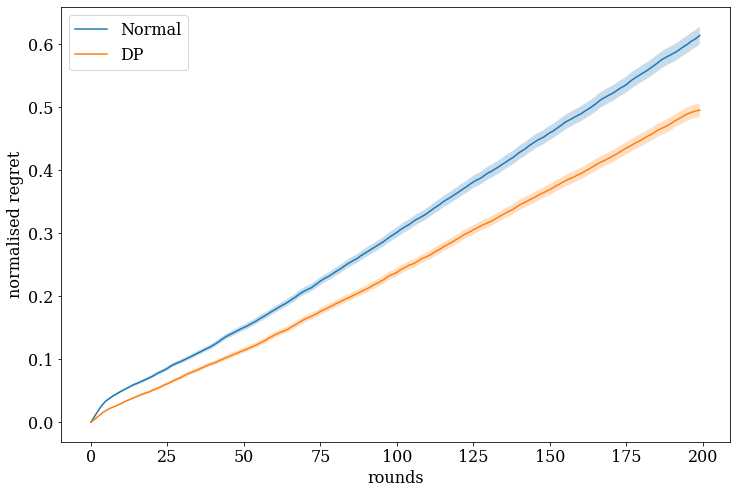

In [22]:
plt.rcParams['font.size'] = '16'
plt.rc('font', family='serif')
plt.figure(figsize=(12, 8))

plt.plot(cumsum_average1,label='Normal')
plt.fill_between(range(T), cumsum_average1-cumsum_std1, cumsum_average1+cumsum_std1, alpha=0.25)

plt.plot(cumsum_average2,label='DP')
plt.fill_between(range(T), cumsum_average2-cumsum_std2, cumsum_average2+cumsum_std2, alpha=0.25)

plt.xlabel('rounds',fontsize=16)
plt.ylabel('normalised regret',fontsize=16)
plt.legend()

Experiment 7 (Step Control) 

In [18]:
steps = [-4,-3,-2,-1,0, 1, 2, 3]

In [13]:
for control in steps:
  
  regret_dp = []
  switch_dp = []

  C = 0.75
  N = 250

  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):
    
  

    T=200

    arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
    arm2=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)
    
    Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))

    regret_holder2,choice2,models=GPR_DP(T,C, control, arm1,arm2)

    regret_dp.append(regret_holder2/Normal)
    
    
  regret_record2=np.array(regret_dp).reshape(N,T)
  regret_cumsum2=np.cumsum(regret_record2,axis=1)
  cumsum_average2=np.mean(regret_cumsum2,axis=0)
  cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)

  #np.savetxt('DP_cost075_step_'+str(control)+'.csv', regret_record2, delimiter=',')




 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |#############################################

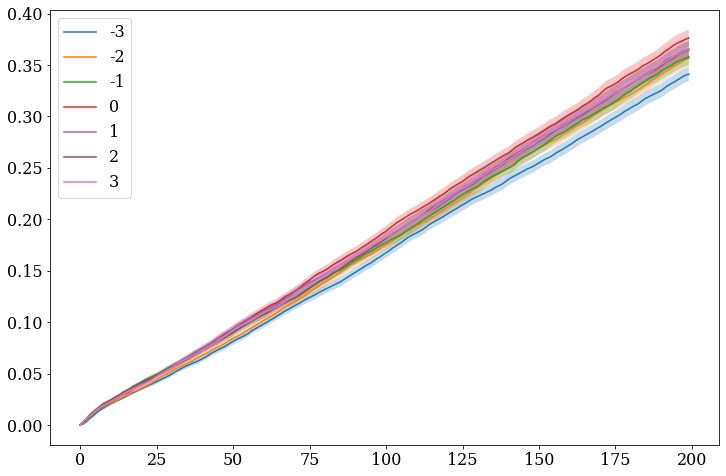

In [21]:
plt.rcParams['font.size'] = '16'
plt.rc('font', family='serif')
plt.figure(figsize=(12, 8))

steps=[-3,-2,-1,0,1,2,3]
for control in steps:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'result/cost3_step_control_'+str(control)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)
    cumsum_std=np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N)

    
    plt.plot(cumsum_average,label=str(control))
    plt.fill_between(range(T), cumsum_average-cumsum_std, cumsum_average+cumsum_std, alpha=0.25)
    
    plt.legend()

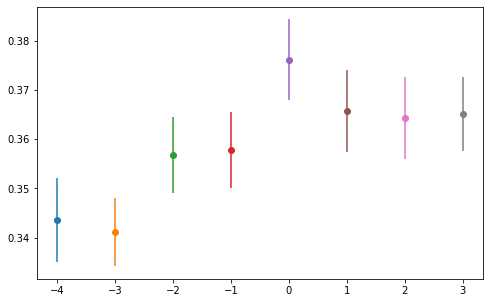

In [6]:
steps=[-4,-3,-2,-1,0,1,2,3]
for control in steps:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'cost3_step_control_'+str(control)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(control, cumsum_average, yerr=cumsum_std, fmt="o")
    
    #data.append(regret_cumsum[:,-1])
    

    

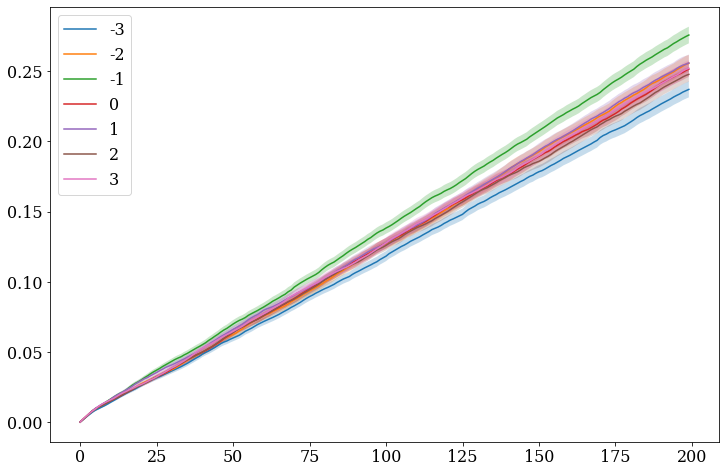

In [5]:
plt.rcParams['font.size'] = '16'
plt.rc('font', family='serif')
plt.figure(figsize=(12, 8))

steps=[-3,-2,-1,0,1,2,3]
for control in steps:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'DP_cost15_step_'+str(control)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)
    cumsum_std=np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N)

    
    plt.plot(cumsum_average,label=str(control))
    plt.fill_between(range(T), cumsum_average-cumsum_std, cumsum_average+cumsum_std, alpha=0.25)
    
    plt.legend()

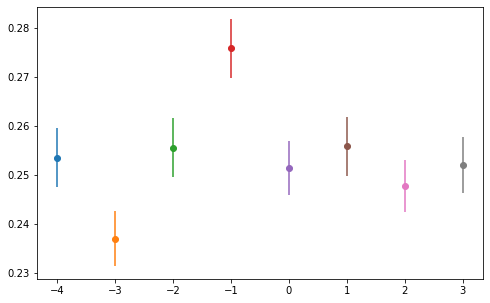

In [4]:
#data = []
steps=[-4,-3,-2,-1,0,1,2,3]
for control in steps:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'DP_cost15_step_'+str(control)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(control, cumsum_average, yerr=cumsum_std, fmt="o")
    
    #data.append(regret_cumsum[:,-1])

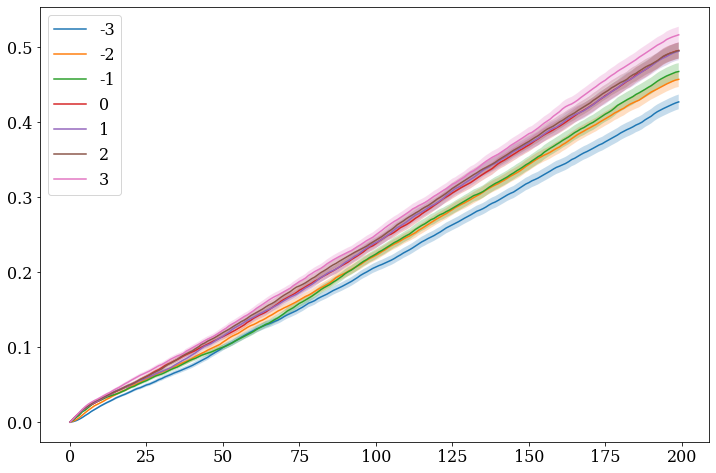

In [11]:
plt.rcParams['font.size'] = '16'
plt.rc('font', family='serif')
plt.figure(figsize=(12, 8))

steps=[-3,-2,-1,0,1,2,3]
for control in steps:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'DP_cost5_step_'+str(control)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)
    cumsum_std=np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N)

    
    plt.plot(cumsum_average,label=str(control))
    plt.fill_between(range(T), cumsum_average-cumsum_std, cumsum_average+cumsum_std, alpha=0.25)
    
    plt.legend()

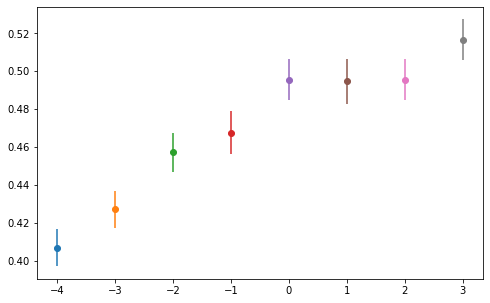

In [9]:
#data = []
steps=[-4, -3,-2,-1,0,1,2,3]
for control in steps:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'DP_cost5_step_'+str(control)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(control, cumsum_average, yerr=cumsum_std, fmt="o")
    
    #data.append(regret_cumsum[:,-1])

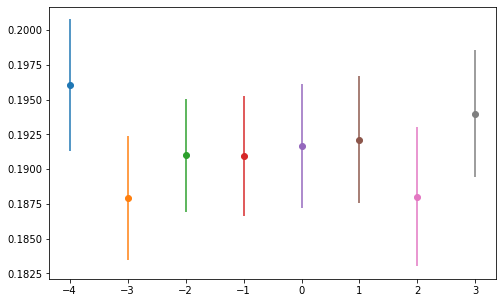

In [14]:
#data = []
steps=[-4, -3,-2,-1,0,1,2,3]
for control in steps:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'DP_cost075_step_'+str(control)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)[-1]
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))[-1]
    
    #plt.scatter(control,cumsum_average)
    plt.errorbar(control, cumsum_average, yerr=cumsum_std, fmt="o")
    
    #data.append(regret_cumsum[:,-1])

Experiment with discount factor

In [2]:
discount_factor_holder=[0.95,0.9,0.85]

In [3]:
for df in discount_factor_holder:
  
  regret_normal = []
  regret_dp = []

  switch_normal = []
  switch_dp = []

  C = 5
  N = 250

  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):

    T=200

    arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
    arm2=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)
    
    Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))


    regret_holder2,choice2,models=GPR_DP(T,C, 0, arm1,arm2, discount_factor=df)
    regret_dp.append(regret_holder2/Normal)
    
    
  regret_record2=np.array(regret_dp).reshape(N,T)
  regret_cumsum2=np.cumsum(regret_record2,axis=1)
  cumsum_average2=np.mean(regret_cumsum2,axis=0)
  cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)


  np.savetxt('DP_cost5_discount_'+str(df)+'.csv', regret_record2, delimiter=',')

 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


In [5]:
regret_normal = []
regret_dp = []

switch_normal = []
switch_dp = []

C = 5
N = 250

pbar = ProgressBar() #showing the progress of the code

for exp in pbar(range(N)):

    T=200

    arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
    arm2=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)

    Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))


    regret_holder2,choice2,models=GPR_DP(T,C, 0, arm1,arm2, discount_factor=0.8)
    regret_dp.append(regret_holder2/Normal)


regret_record2=np.array(regret_dp).reshape(N,T)
regret_cumsum2=np.cumsum(regret_record2,axis=1)
cumsum_average2=np.mean(regret_cumsum2,axis=0)
cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)


np.savetxt('DP_cost5_discount_0.8.csv', regret_record2, delimiter=',')

 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
100% |########################################################################|


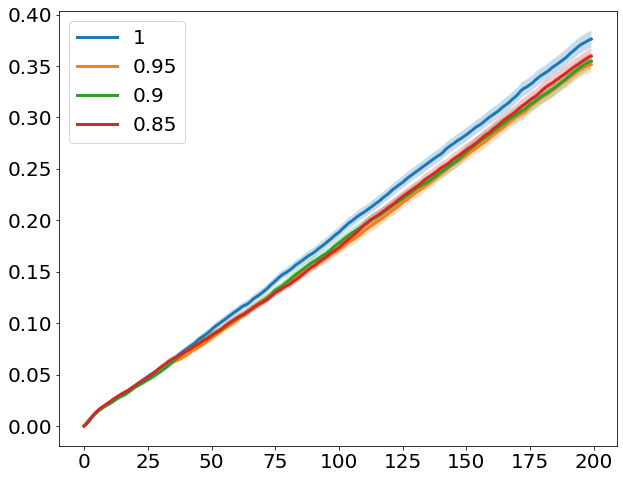

In [23]:
discount_factor_holder=[0.95,0.9,0.85]
plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

regret_record = np.genfromtxt(os.path.join(os.getcwd(),'DP_cost3.csv'), delimiter=',')
regret_cumsum=np.cumsum(regret_record,axis=1)
cumsum_average=np.mean(regret_cumsum,axis=0)
cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))
plt.plot(cumsum_average,linewidth=3,label='1')
plt.fill_between(range(T), cumsum_average-cumsum_std, cumsum_average+cumsum_std, alpha=0.25)

for df in discount_factor_holder:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'DP_cost3_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))
    
    plt.plot(cumsum_average,linewidth=3,label=str(df))
    plt.fill_between(range(T), cumsum_average-cumsum_std, cumsum_average+cumsum_std, alpha=0.25)

plt.legend()

df 0.95 is:  0.4807832024692857
df 0.9 is:  0.46345465592887075
df 0.85 is:  0.43268195720888614
df 0.8 is:  0.42528737318455406


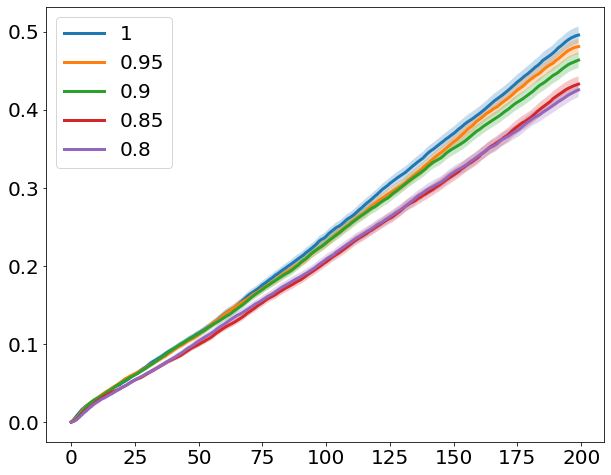

In [8]:
discount_factor_holder=[0.95,0.9,0.85,0.8]
plt.rcParams['font.size'] = '20'
plt.rc('font', family='Times New Roman')
plt.figure(figsize=(10, 8))

regret_record = np.genfromtxt(os.path.join(os.getcwd(),'DP_cost5.csv'), delimiter=',')
regret_cumsum=np.cumsum(regret_record,axis=1)
cumsum_average=np.mean(regret_cumsum,axis=0)
cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))
plt.plot(cumsum_average,linewidth=3,label='1')
plt.fill_between(range(T), cumsum_average-cumsum_std, cumsum_average+cumsum_std, alpha=0.25)

for df in discount_factor_holder:
    N = 250
    T = 200

    regret_record = np.genfromtxt(os.path.join(os.getcwd(),'DP_cost5_discount_'+str(df)+'.csv'), delimiter=',')
    regret_cumsum=np.cumsum(regret_record,axis=1)
    cumsum_average=np.mean(regret_cumsum,axis=0)
    cumsum_std=(np.sqrt(np.var(regret_cumsum,axis=0))/math.sqrt(N))
    
    plt.plot(cumsum_average,linewidth=3,label=str(df))
    plt.fill_between(range(T), cumsum_average-cumsum_std, cumsum_average+cumsum_std, alpha=0.25)
    print('df '+str(df)+' is: ',cumsum_average[-1] )

plt.legend()